# Exploration data analysis of avalanche accidents in France

In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Table of contents

<ul>
    <li><a href="#reading">1. Reading dataset and viewing general info</a></li>    
    <li><a href="#viz">2. Visualization</a></li>
        <ul>
            <li><a href="#viz_1">2.1 Visualization of most dangerous months for avalanche accidents and other time related info</a></li>  
            <li><a href="#viz_2">2.2 Visualization of most dangerous activities on mountains</a></li>
            <li><a href="#viz_3">2.3 Visualization of most dangerous group size when moving on mountains</a></li>
            <li><a href="#viz_4">2.4 Visualization of most dangerous altitude </a></li>
            <li><a href="#viz_5">2.5 Visualization of most dangerous time during the day</a></li>
        </ul>
    <li><a href="#french_alps">3. Focus only on massifs on French Alps</a></li>
        <ul>
            <li><a href="#alps_1">3.1 Import of data from shapefile for later geospatial visualization</a></li>
            <li><a href="#alps_2">3.2 Geospatial visualization with Bokeh</a></li>
        </ul>
</ul>

<a id='reading'></a>
## Reading dataset and viewing general info

In [2]:
# reading dataset based on open data from yearly ANENA reports 
# source: https://www.anena.org/5041-bilan-des-accidents.htm
file = os.path.join('5041-bilan-des-accidents - cleaned.csv')
df = pd.read_csv(file)
pd.set_option('display.max_columns', 500)
df.head()

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\n zone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \n tête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \n neige,cohésion\n neige,type \n départ,cause départ,dénivelé\n (mètres),largeur \n cassure\n (mètres),épaisseur\n cassure max. \n (cm)
0,1011-05-09,2011-03-19,15:30,5,molines,queyras,alps,Queyras,rif ousselat,32t 0333526 4953556,2540.0,40-44,N,2.0,1,1,1,0,0,hors-piste,"off-piste (ski, snowboard)",NaN,3.0,sèche,tendre,linéaire,accidentelle soi-même,450.0,800.0,70.0
1,1415-73-04,2015-01-05,13:05,73,sainte foy tarentaise,haute tarentaise,alps,Hte-tarent,face nord fogliettaz,"45°34'55.9"" / 6°56'17.66""",2820.0,40-44,N,6.0,5,0,0,0,3,randonnée,hiking,NaN,3.0,sèche,tendre,linéaire,accidentelle soi-même,330.0,800.0,100.0
2,1718-73-12,2018-02-18,12:35,73,val d'isere,haute tarentaise,alps,Hte-tarent,piste rouge combe du géant / pisaillas,"45°25'48"" / 7°02'47""",3050.0,>45,S,7.0,3,2,2,0,0,hors-piste,"off-piste (ski, snowboard)",NaN,3.0,humide,tendre,linéaire,naturelle,200.0,500.0,80.0
3,1011-05-08,2011-03-19,12:05,5,ceillac,queyras,alps,Queyras,vallon beaubarnon,32t 0328612 4945259,2530.0,30-34,N,4.0,4,3,3,0,1,randonnée,hiking,NaN,3.0,sèche,tendre,linéaire,accidentelle soi-même,150.0,500.0,60.0
4,1718-73-06,2018-01-03,16:00,73,bonneval sur arc,haute tarentaise,alps,Hte-tarent,lécharenne pont de la lama,"45°23'6"" / 7°4'24""",2500.0,35-39,SE,1.0,1,1,1,0,0,habitation,other,NaN,4.0,sèche,NaN,linéaire,naturelle,600.0,450.0,NaN


In [3]:
# checking dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   code accident                   569 non-null    object 
 1   date                            569 non-null    object 
 2   heure                           373 non-null    object 
 3   département                     569 non-null    int64  
 4   commune                         569 non-null    object 
 5   massif                          569 non-null    object 
 6   region                          569 non-null    object 
 7   massif_unique                   569 non-null    object 
 8   site                            440 non-null    object 
 9   coordonnées
 zone départ        239 non-null    object 
 10  altitude                        330 non-null    float64
 11  inclinaison                     299 non-null    object 
 12  orientation                     331 

In [4]:
# viewing all column names
df.columns

Index(['code accident', 'date', 'heure', 'département', 'commune', 'massif',
       'region', 'massif_unique', 'site', 'coordonnées\n zone départ',
       'altitude', 'inclinaison', 'orientation', 'groupe', 'emportés',
       'ensevelis \n tête', 'décédés', 'blessées', 'indemnes', 'activité',
       'activite_regrouped', 'évolution', 'BRA', 'qualité \n neige',
       'cohésion\n neige', 'type \n départ', 'cause départ',
       'dénivelé\n (mètres)', 'largeur \n cassure\n (mètres)',
       'épaisseur\n cassure max. \n (cm)'],
      dtype='object')

In [5]:
# removing dates out of range for my analysis
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[(df["date"]>"2010-9-30") & (df["date"]<"2019-10-01")]

<a id='viz'></a>
## Visualization
<a id='viz_1'></a>
### Visualization of most dangerous months for avalanche accidents and other time related info

In [6]:
# creating new variable by extracting month from date
df['month'] = df['date'].dt.month_name().str.slice(0,3)

In [7]:
# creating dataframe with monthly data
df_monthly = df["month"].value_counts()
df_monthly = df_monthly.to_frame().reset_index()
df_monthly

,index,month
0,Mar,136
1,Feb,116
2,Jan,104
3,Dec,75
4,Apr,54
5,May,18
6,Nov,11
7,Oct,3
8,Jun,2
9,Aug,2


In [8]:
# renaming columns and checking the result
df_monthly.columns = ['month', 'avalanche accidents count']
df_monthly.head(6)

,month,avalanche accidents count
0,Mar,136
1,Feb,116
2,Jan,104
3,Dec,75
4,Apr,54
5,May,18


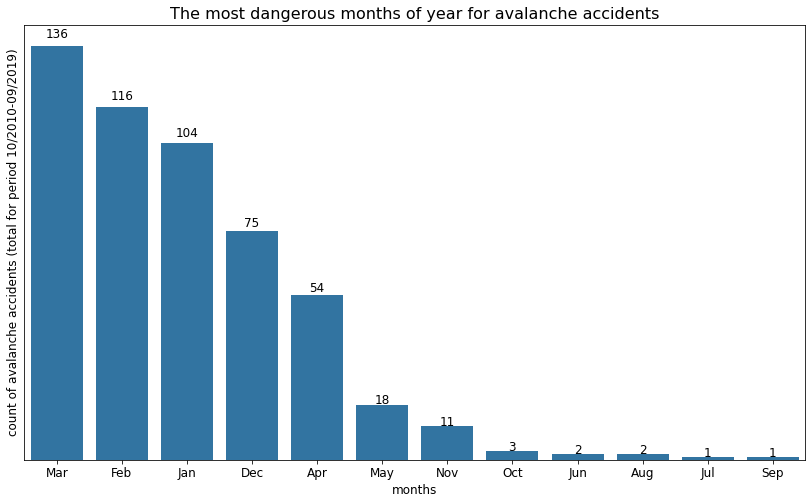

In [9]:
# final visualization of avalanche accidents by months
plt.figure(figsize=(14,8))
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df_monthly, x='month', y='avalanche accidents count', color=base_color)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(yticks=[])
plt.title('The most dangerous months of year for avalanche accidents', fontsize=16)
plt.xlabel('months', fontsize=12)
plt.ylabel('count of avalanche accidents (total for period 10/2010-09/2019)', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,.0f}".format(height),
            ha="center", size=12)
    
plt.savefig('dangerous_months_accidents', bbox_inches='tight', dpi=600)
plt.show();

In [10]:
# checking distribution of avalanche accidents by year
# we have to bear in mind that years 2010 and 2019 are not fully represented in my dataset
df['year'] = df.date.dt.year
df['year'].value_counts()

2018    82
2013    74
2014    55
2015    54
2017    53
2019    52
2016    50
2012    43
2011    39
2010    21
Name: year, dtype: int64

In [11]:
# creating list of summer months
summer = ['Jul', 'Aug', 'Sep']

In [12]:
# checking all records for summer avalanches
df[df["month"].isin(summer)]

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\n zone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \n tête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \n neige,cohésion\n neige,type \n départ,cause départ,dénivelé\n (mètres),largeur \n cassure\n (mètres),épaisseur\n cassure max. \n (cm),month,year
20,1415-05-12,2015-09-15,11:45,5,pelvoux,pelvoux,alps,Pelvoux,dome de neige des Ecrins,"44°55'23.2"" / 6°21'30.7""",3965.0,40-44,N,8.0,8,5,1,4,0,alpinisme,alpinisme,traversée,NaN,humide,dure,linéaire,accidentelle soi-même,220.0,250.0,200.0,Sep,2015
281,1213-74-12,2013-08-13,03:50,74,chamonix,mont blanc,alps,Mont-Blanc,face nord tacul,NaN,4300.0,40-44,N,6.0,3,2,2,0,1,alpinisme,alpinisme,NaN,NaN,sèche,dure,linéaire,naturelle sérac/corniche,250.0,NaN,NaN,Aug,2013
286,1112-74-09,2012-07-12,05:20,74,chamonix,mont blanc,alps,Mont-Blanc,mont maudit,32t 0334992 5079521,4200.0,40-44,N,23.0,23,9,9,0,0,alpinisme,alpinisme,NaN,NaN,sèche,dure,linéaire,naturelle sérac/corniche,200.0,NaN,NaN,Jul,2012
506,1415-74-11,2015-08-25,08:40,74,chamonix,mont blanc,alps,Mont-Blanc,face nord goûter,NaN,NaN,NaN,NaN,3.0,2,0,0,0,0,alpinisme,alpinisme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug,2015


<a id='viz_2'></a>
### Visualization of most dangerous activities on mountains

In [13]:
# creating dataframe with data for activities
df_activity = df.activite_regrouped.value_counts()
df_activity = df_activity.to_frame().reset_index()
df_activity.head(6)

,index,activite_regrouped
0,hiking,230
1,"off-piste (ski, snowboard)",195
2,"cross-country (ski, snowboard etc.)",40
3,alpinisme,30
4,other,20
5,"piste (ski, snowboard)",8


In [14]:
# renaming columns
df_activity.columns = ['activity', 'avalanche accidents count']
df_activity.head(6)

,activity,avalanche accidents count
0,hiking,230
1,"off-piste (ski, snowboard)",195
2,"cross-country (ski, snowboard etc.)",40
3,alpinisme,30
4,other,20
5,"piste (ski, snowboard)",8


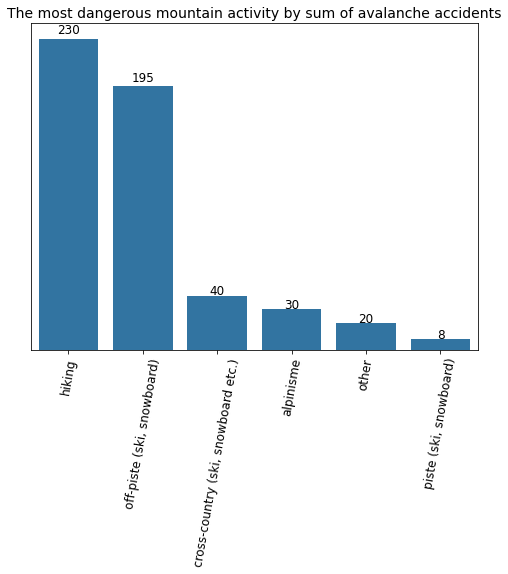

In [15]:
# final visualization of avalanche accidents by activity
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df_activity, x='activity', y='avalanche accidents count', color=base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=12, horizontalalignment='center')
ax.set(yticks=[])
plt.title('The most dangerous mountain activity by sum of avalanche accidents', fontsize=14)
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,.0f}".format(height),
            ha="center", size=12)
    
plt.savefig('dangerous_activity_accidents', bbox_inches='tight', dpi=600)
plt.show();

In [16]:
# checking avalanche accidents by different massifs
df.massif_unique.value_counts()

Vanoise       71
Hte-tarent    54
Mont-Blanc    43
Hte-maurie    33
Queyras       29
Pelvoux       26
Chablais      25
Oisans        23
Aravis        21
hte-bigo      20
Maurienne     18
Belledone     18
Gdes-rouss    14
other         14
Beaufortin    13
Chartreuse    13
Mercantour    11
Thabor        10
Ubaye         10
Vercors        8
Parpaillon     8
Champsaur      8
Bauges         8
hte-ariege     5
luchonnais     5
capcir         4
aspe-ossau     3
Devoluy        2
couseran       2
Ht_Var-Ver     2
aure_lour      1
cerdagne       1
Name: massif_unique, dtype: int64

In [17]:
# correcting typo in massif name
df.loc[df.massif_unique=="Belledone", 'massif_unique']="Belledonne"

In [18]:
# checking distribution of avalanche accidents in different regions
df.region.value_counts()

alps        468
pyrenees     41
other        14
Name: region, dtype: int64

<a id='viz_3'></a>
### Visualization of most dangerous group size when moving on mountains

In [19]:
# checking value counts for group size
df.groupe.value_counts()

2.0     142
3.0      79
1.0      72
4.0      52
5.0      21
6.0      18
7.0      15
8.0       7
9.0       7
15.0      5
11.0      4
10.0      3
12.0      3
33.0      1
20.0      1
18.0      1
14.0      1
52.0      1
50.0      1
13.0      1
22.0      1
23.0      1
19.0      1
Name: groupe, dtype: int64

In [23]:
df['groupe']

0      2
1      6
2      7
3      4
4      1
      ..
554    0
555    0
556    0
566    0
568    0
Name: groupe, Length: 523, dtype: int64

In [20]:
# removing nans from groupe variables and changing data type from float to integer
df.groupe = df.groupe.fillna(0)
df.groupe = df.groupe.astype(int)

In [21]:
# regrouping values for group size variables
def group_category(x):
    if x == 0:
        return None
    elif x in range(1, 8):
        return x
    elif x in range(8, 11):
        return "8-10"
    elif x in range(11, 15):
        return "11-14"
    else:
        return "more than 15"

df['groupe_edited'] = df.groupe.apply(group_category)                             

In [ ]:
# new dataframe for group size
avalanche_group = (df.groupe_edited.value_counts()).to_frame().reset_index()
avalanche_group.columns = ['size_of_group', 'sum_of_avalanche_accidents']
avalanche_group

In [ ]:
# final visualization of avalanche accidents by group size
df_group = df[df["groupe"]>0]

base_color = sns.color_palette()[0]
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_group, x='groupe', color=base_color)
ax.grid(False)
plt.title("Distribution of avalanche accidents by size of group", fontsize=14)
plt.xlabel("group size")
plt.ylabel("count")
plt.savefig('dangerous_group_size_accidents', bbox_inches='tight', dpi=600)
plt.show();

<a id='viz_4'></a>
### Visualization of most dangerous altitude

In [ ]:
# checking most dangerous altitudes
df.altitude.value_counts()

In [ ]:
# looking for lowest altitude and getting further insight about different values
np.sort(df.altitude.unique())

In [ ]:
# final visualization for avalanche accidents by altitudes
binsize = 100
bins = np.arange(1000, df.altitude.max()+binsize, binsize)
plt.figure(figsize=(10,6))
plt.hist(data=df, x='altitude', bins=bins, color=base_color)
plt.title("Distribution of avalanche accidents by altitude", fontsize=16)
plt.xlabel("altitude in metres", fontsize=12)
plt.ylabel("count of avalanche accidents", fontsize=12)
plt.savefig('dangerous_altitude_accidents', bbox_inches='tight', dpi=600)
plt.show();

In [ ]:
# removing nans and changing data type from float to integer
df.altitude = df.altitude.fillna(0)
df.altitude = df.altitude.astype(int)

In [ ]:
# regrouping of altitude values
df['altitude_edited'] = df.altitude.apply(lambda x:
                                     None if x < 1000
                                    else "1000-1499" if x < 1500
                                    else "1500-1999" if x < 2000
                                    else "2000-2499" if x < 2500
                                    else "2500-2999" if x < 3000
                                    else "3000-3499" if x < 3500
                                    else "3500-3999" if x < 4000
                                   else "4000+")

In [ ]:
# checking results for regrouped altitude values
df.altitude_edited.value_counts()

<a id='viz_5'></a>
### Visualization of most dangerous time during the day

In [ ]:
# checking values for hour of accidents
df.heure.value_counts()

In [ ]:
# checking data type of hour variable
np.dtype(df.heure)

In [ ]:
# changing data type to datetime for easier handling of variable
import datetime as dt
df['hour_of_day'] = (pd.to_datetime(df.heure)).dt.hour

In [ ]:
# viewing all unique values
df["hour_of_day"].unique()

In [ ]:
# creating new dataframe to store hourly data
hour_df = df[df["hour_of_day"]>0]

In [ ]:
# final visualization of most dangerous hour of day for avalanche accidents
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
ax = sns.countplot(data=hour_df, x='hour_of_day', color=base_color)
plt.title("Distribution of avalanche accidents by hour of day", fontsize=16)
plt.xlabel("hours of day", fontsize=12)
plt.ylabel("count of avalanche accidents", fontsize=12)
plt.savefig('dangerous_hours_of_day_accidents', bbox_inches='tight', dpi=600)
plt.show()
ax.grid(False)

In [ ]:
# displaying info for other variables
df.évolution.value_counts()

In [ ]:
df["qualité \nneige"].value_counts()

In [ ]:
df["cohésion\nneige"].value_counts()

In [ ]:
df["cause départ"].value_counts()

<a id='french_alps'></a>
## Focus only on massifs on French Alps

In [ ]:
# selecting only data for French Alps
df_alps = df[df["region"]=="alps"]

In [ ]:
df_alps.head()

In [ ]:
# creating new dataframe for sum of avalanche accidents in different massifs of French Alps
df_alps_sum_aval = df_alps[["massif_unique", "code accident"]]

In [ ]:
df_alps_sum_aval = df_alps_sum_aval.groupby("massif_unique").count().reset_index().sort_values(by="code accident", ascending=False)
df_alps_sum_aval.columns=["massif","sum_of_avalanches"]
df_alps_sum_aval

In [ ]:
# checking total number of avalanche accidents in French Alps
df_alps_sum_aval.sum_of_avalanches.sum()

<a id='alps_1'></a>
## Import of data from shapefile for later geospatial visualization

In [ ]:
# importing Geopandas library for handling geospatial data
import geopandas as gpd

# reading shapefile of massifs in french Alps
gdf_alps = gpd.read_file(r".\\shapefile\\massifs_alpes_2154.shp")

In [ ]:
# merge of shapefile and data with sum of avalanche accidents
aval_accidents_viz = pd.merge(gdf_alps, df_alps_sum_aval, how="left", left_on="nom_reduit", right_on="massif")

In [ ]:
# checking nez dataframe
aval_accidents_viz

In [ ]:
# displaying general infor about new dataframe
aval_accidents_viz.info()

In [ ]:
# verifying names of massifs
aval_accidents_viz.nom.unique()

<a id='alps_2'></a>
## Geospatial visualization with Bokeh

In [ ]:
# importing objects from Bokeh library for further use for visualization
from bokeh.io import save, output_notebook
from bokeh.models import (ColorBar,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper)
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show

In [ ]:
# importing json because geosource has to be in format of JSON
import json
geosource = GeoJSONDataSource(geojson = aval_accidents_viz.to_json())

In [ ]:
# define color palettes
palette = brewer['YlGnBu'][9]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# instantiate LinearColorMapper that linearly maps numbers in a range into a sequence of colors
# and nan values will be colored in grey
color_mapper = LinearColorMapper(palette = palette, low = 2, high = 71, nan_color = '#d9d9d9')

# create color bar
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 400, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',)

In [ ]:
# create figure object
p = figure(title = 'Avalanche accidents from 10/2010 till 09/2019 in massifs of french Alps', 
           plot_height = 700,
           plot_width = 500, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [ ]:
# add patch renderer to figure
massifs = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'sum_of_avalanches',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.20, 
                   fill_alpha = 1)

In [ ]:
# create hover tool
p.add_tools(HoverTool(renderers = [massifs],
                      tooltips = [('massif','@nom'),
                                ('sum_of_avalanches','@sum_of_avalanches')]))

p.add_layout(color_bar, 'below')

In [ ]:
# final visualization can be seen as html page
output_notebook()
show(p)

In [ ]:
# creating new color mapper in order to compare color scale with avalanche events which have max 210
color_mapper_2 = LinearColorMapper(palette = palette, low = 2, high = 210, nan_color = '#d9d9d9')

color_bar = ColorBar(color_mapper = color_mapper_2, 
                     label_standoff = 8,
                     width = 400, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',)

p_2 = figure(title = 'Avalanche accidents from 10/2010 till 09/2019 in massifs of french Alps', 
           plot_height = 700,
           plot_width = 500, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p_2.xgrid.grid_line_color = None
p_2.ygrid.grid_line_color = None

# add patch renderer to figure
massifs = p_2.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'sum_of_avalanches',
                                 'transform' : color_mapper_2},
                   line_color = 'gray', 
                   line_width = 0.20, 
                   fill_alpha = 1)

p_2.add_tools(HoverTool(renderers = [massifs],
                      tooltips = [('massif','@nom'),
                                ('sum_of_avalanches','@sum_of_avalanches')]))

p_2.add_layout(color_bar, 'below')


output_notebook()
show(p_2)